In [20]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("papers_processed.csv",  delimiter=";", quotechar="|", encoding="utf-8", header=None)
df.columns = ["paper_id", "paper_title", "domain", "num_tables", "num_figures"]

# Display basic info
print(df.info(),"\n")
print(df.head(),"\n")
print(df.describe(),"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102549 entries, 0 to 102548
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   paper_id     102549 non-null  float64
 1   paper_title  102549 non-null  object 
 2   domain       102549 non-null  object 
 3   num_tables   102549 non-null  int64  
 4   num_figures  102549 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 3.9+ MB
None 

     paper_id                                        paper_title domain  \
0  2305.02736     Separability and Non-Determinizability of WSTS     cs   
1  2305.07570  Isotropic Point Cloud Meshing using unit Spher...     cs   
2  2305.15805  Dynamic Context Pruning for Efficient and Inte...     cs   
3  2306.10843  Female mosquito detection by means of AI techn...     cs   
4  2307.08187  An Empirical Study of Pre-trained Model Select...     cs   

   num_tables  num_figures  
0           0            0  
1          

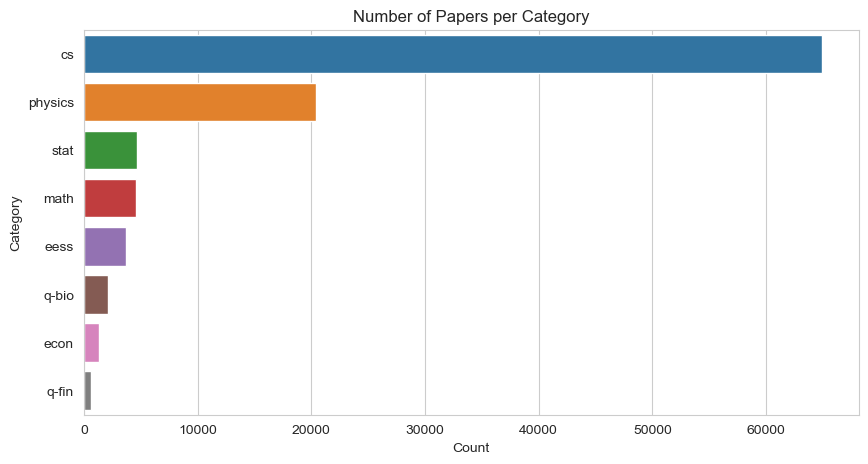

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(y=df["domain"], order=df["domain"].value_counts().index)
plt.title("Number of Papers per Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

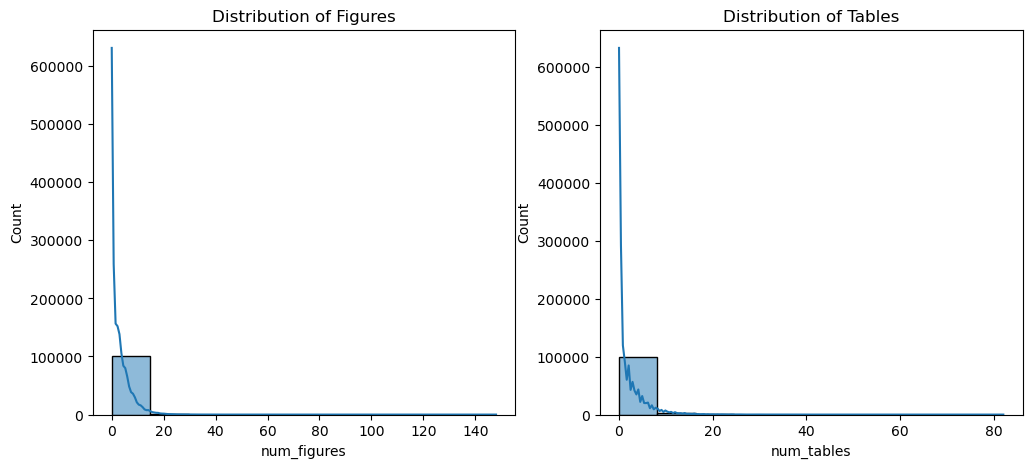

In [22]:
plt.figure(figsize=(12, 5))

# Figures distribution
plt.subplot(1, 2, 1)
sns.histplot(df["num_figures"], bins=10, kde=True)
plt.title("Distribution of Figures")

# Tables distribution
plt.subplot(1, 2, 2)
sns.histplot(df["num_tables"], bins=10, kde=True)
plt.title("Distribution of Tables")

plt.show()

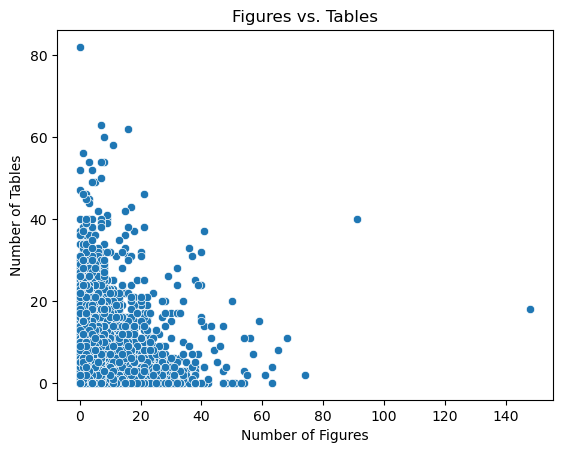

In [23]:
sns.scatterplot(x=df["num_figures"], y=df["num_tables"])
plt.title("Figures vs. Tables")
plt.xlabel("Number of Figures")
plt.ylabel("Number of Tables")
plt.show()

         num_figures  num_tables
domain                          
cs          2.569441    1.914421
econ        2.106227    2.547253
eess        3.298448    1.596895
math        1.020289    0.475718
physics     3.525015    0.811974
q-bio       3.237716    0.930276
q-fin       2.584252    2.044094
stat        2.439838    1.603316


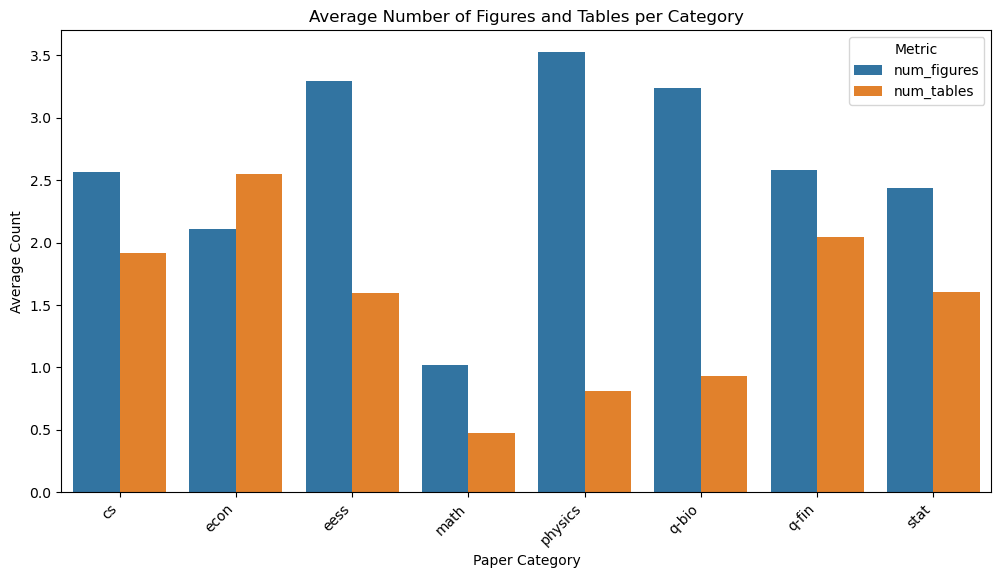

In [24]:
df["num_figures"] = pd.to_numeric(df["num_figures"], errors="coerce")
df["num_tables"] = pd.to_numeric(df["num_tables"], errors="coerce")

# Group by category and compute averages
category_averages = df.groupby("domain")[["num_figures", "num_tables"]].mean()

# Display the summary
print(category_averages)

plt.figure(figsize=(12, 6))

# Reshape data for better plotting
category_averages.reset_index(inplace=True)
melted_df = category_averages.melt(id_vars="domain", var_name="Metric", value_name="Average Count")

# Plot
sns.barplot(data=melted_df, x="domain", y="Average Count", hue="Metric")
plt.xticks(rotation=45, ha="right")  # Rotate category labels for readability
plt.title("Average Number of Figures and Tables per Category")
plt.ylabel("Average Count")
plt.xlabel("Paper Category")
plt.legend(title="Metric")
plt.show()